In [24]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z score
from sklearn.preprocessing import StandardScaler

# import data

In [25]:
gender=pd.read_csv('gender_submission.csv')
train_original=pd.read_csv('train.csv')
test_original=pd.read_csv('test (1).csv')

In [26]:
gender.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [27]:
train_original.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


# check data information



In [28]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
#check duplicate
train_original[train_original.duplicated()]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [30]:
#check basic descriptive analysis
train_original.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [31]:
train_original.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


# draw figures

## scatter chart of survived vs Fare

Text(0, 0.5, 'Survived')

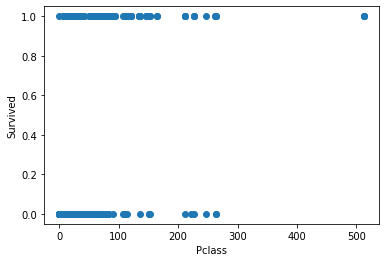

In [32]:

# data
X = train_original['Fare']
Y = train_original['Survived']

# plot the scatter plot
plt.scatter(X,Y)


# add the axes labels to the plot
plt.xlabel('Pclass')
plt.ylabel('Survived')



## histgram

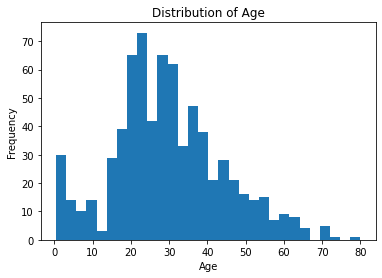

In [33]:
#create histgram
# plot the histogram
# specify the number of bins, using 'bins' parameter
plt.hist(train_original['Age'], bins= 30)

# add the graph title and axes labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# display the plot
plt.show()

## draw pair plot for all columns

<Figure size 576x576 with 0 Axes>

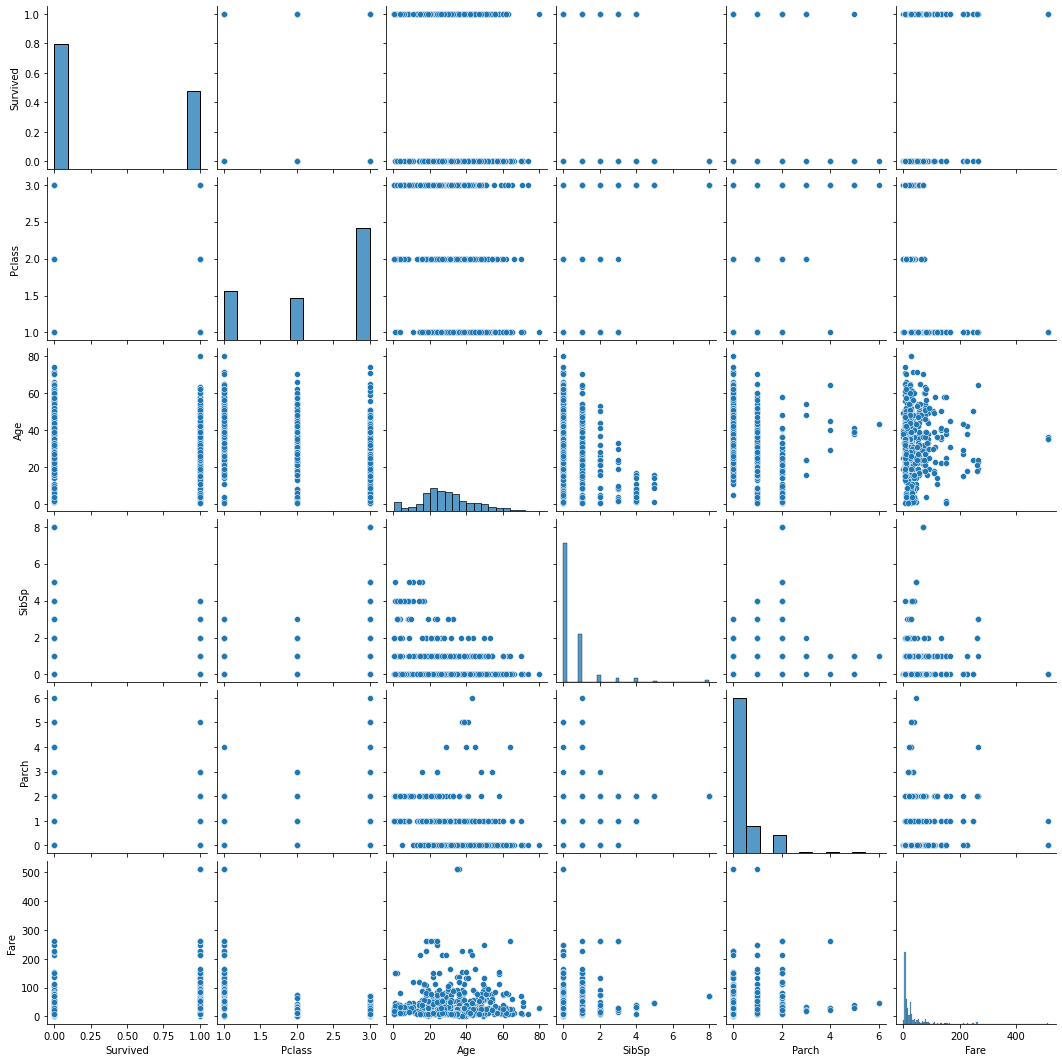

In [34]:
#Pair Plot
# set the figure size
train1= train_original.iloc[:,1:]  #drop column of PassengerId
plt.figure(figsize = (8,8))

# plot a pair plot
sns.pairplot(train1)

# display the plot
plt.show()

## draw pie chart


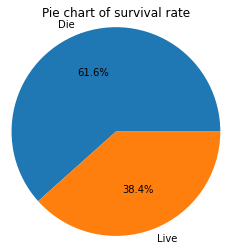

In [35]:
# plot survived percentage

# 'autopct' displays the percentage upto 1 decimal place
# 'radius' sets the radius of the pie plot
name=['Die','Live']
plt.pie(train_original['Survived'].value_counts(), autopct = '%.1f%%', radius = 1.2, labels=name)
plt.title('Pie chart of survival rate')
# display the plot
plt.show()

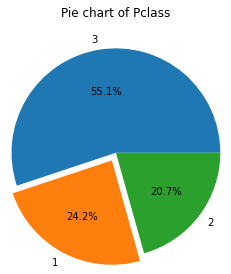

In [36]:
#pie chart of class
name=train_original['Pclass'].unique()
explode=np.zeros(3)
explode[1] = 0.1
plt.pie(train_original['Pclass'].value_counts(), autopct = '%.1f%%', radius = 1.2, labels=name,explode =explode)
plt.title('Pie chart of Pclass',x=0.5, y=1.1)

# display the plot
plt.show()


## try box plot of age

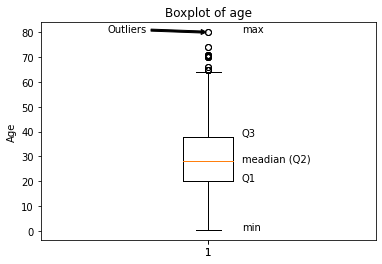

In [37]:
# plot a distribution of total bill
trainage = train_original[train_original['Age'].notna()]
plt.boxplot(trainage['Age'])

plt.boxplot(trainage['Age'])
plt.text(x = 1.1, y = trainage['Age'].min(), s ='min')
plt.text(x = 1.1, y = trainage['Age'].quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = trainage['Age'].median(), s ='meadian (Q2)')
plt.text(x = 1.1, y = trainage['Age'].quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = trainage['Age'].max(), s ='max')

# add an arrow (annonate) to show the outliers
plt.annotate('Outliers', xy = (1,80),xytext=(0.7,80), arrowprops = dict(facecolor='black', arrowstyle = 'simple'))


# add the graph title and axes labels
plt.title('Boxplot of age')
plt.ylabel('Age')
# display the plot
plt.show()

## try strip plot Pclass vs Fare

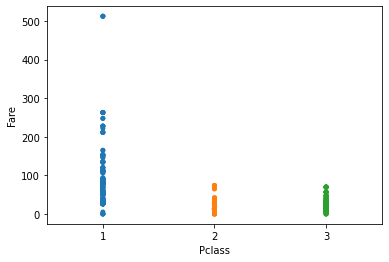

In [38]:


# strip plot
sns.stripplot(y = 'Fare', x = 'Pclass', data = train_original, jitter=False)

# display the plot
plt.show()

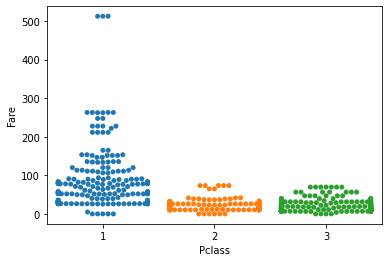

In [39]:
# swarm plot
sns.swarmplot(y = 'Fare', x = 'Pclass', data = train_original)

# display the plot
plt.show()

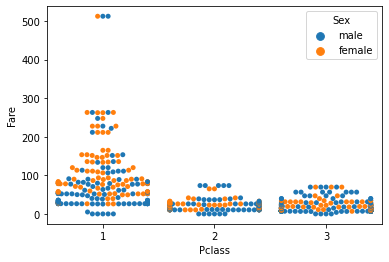

In [41]:
# swarm plot with one more categorical variable 'day'
sns.swarmplot(y = 'Fare', x = 'Pclass', data = train_original, hue = 'Sex')

# display the plot
plt.show()

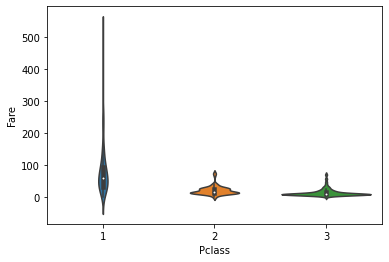

In [42]:
#2.3 Violin Plot

# violin plot
sns.violinplot(y = 'Fare', x = 'Pclass', data = train_original)

# display the plot
plt.show()

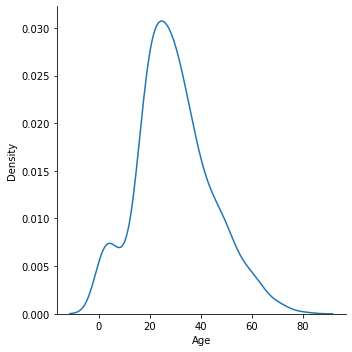

In [43]:
# plot a distribution plot
sns.displot(train_original['Age'], kind='kde')

# display the plot
plt.show()

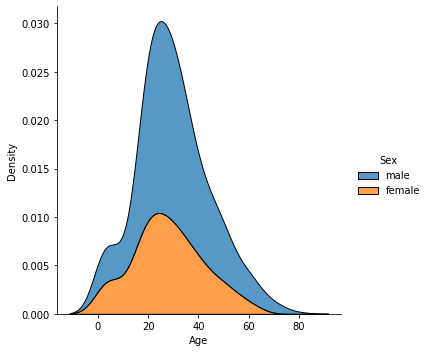

In [44]:
sns.displot(data=train_original, x='Age', hue='Sex', kind='kde', multiple= 'stack')

In [45]:
# compute correlation
train1= train_original.iloc[:,1:]  #drop column of PassengerId
corr_matrix = train1.corr()

corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


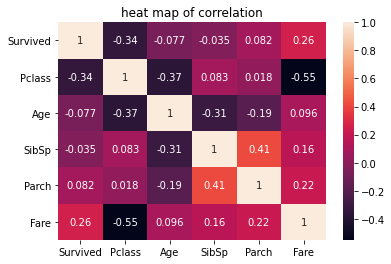

In [46]:
# plot heatmap
# 'annot=True' returns the correlation values 
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.title('heat map of correlation')
plt.show()

# scaling the data


In [47]:
train_original.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [48]:
train_new=train_original.drop(columns=['Name','Ticket','Cabin','Embarked','PassengerId','Sex'])
train_new

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [49]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(train_new), columns=train_new.columns)

data_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,-0.789272,0.827377,-0.530377,0.432793,-0.473674,-0.502445
1,1.266990,-1.566107,0.571831,0.432793,-0.473674,0.786845
2,1.266990,0.827377,-0.254825,-0.474545,-0.473674,-0.488854
3,1.266990,-1.566107,0.365167,0.432793,-0.473674,0.420730
4,-0.789272,0.827377,0.365167,-0.474545,-0.473674,-0.486337


In [50]:
#drop null row
data_scaled2=data_scaled.copy()
data_scaled2=data_scaled2.dropna()
train_new2=train_new.dropna()


# K-means clustering

In [51]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


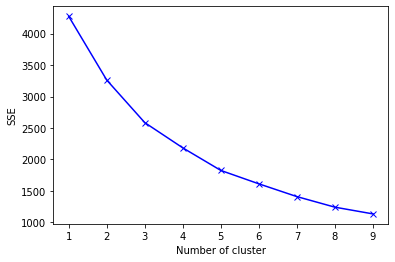

In [52]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled2)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

observations:
we can see from the plot that there is a consistent dip from 2 to 9. and there doesn't seem to be a clear 'elbow' here. We may chose any from 2 to 9 as our # of clusters. 
So, let's look at another method to get a 'second opinion from maths'. Let's create a plot with Silhouette scores to see how it varies with k.

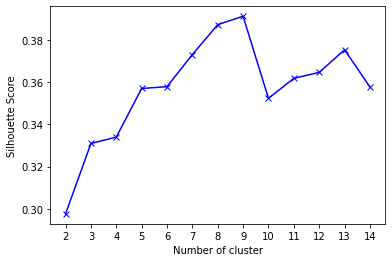

In [62]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled2)
    labels = kmeans.predict(data_scaled2)
    sc[k] = silhouette_score(data_scaled2, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2,15,1))
plt.show()

number =9 get the largest Silhouette Score, so I choose 9 cluster

In [63]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled2)

#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled2.copy(deep=True)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled2)
train_new2['KMeans_Labels'] = kmeans.predict(data_scaled2)

In [64]:
train_new2['KMeans_Labels'].value_counts()

3    282
8    105
5    100
0     89
2     57
7     32
4     26
6     20
1      3
Name: KMeans_Labels, dtype: int64

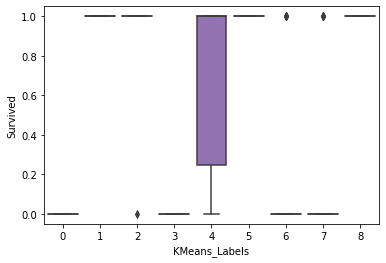

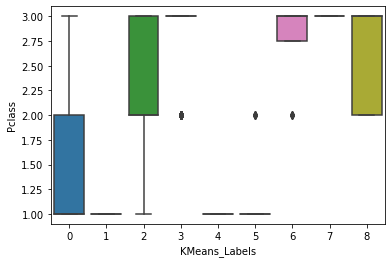

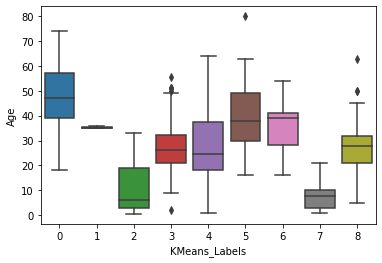

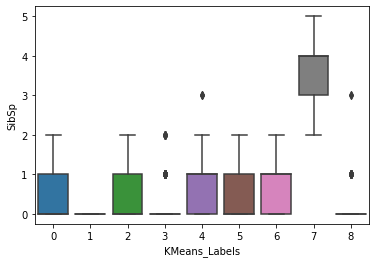

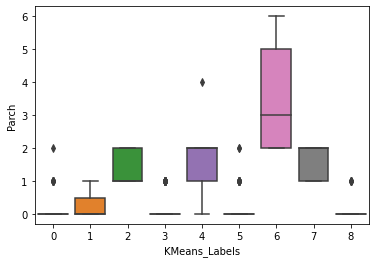

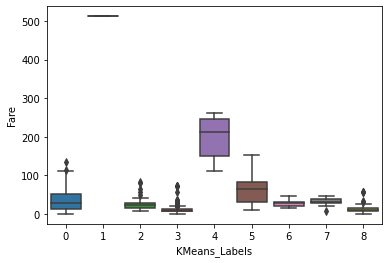

In [65]:
cols_visualise = train_new2.columns.tolist()[0:6]

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = train_new2)
    plt.show()

# clean data

In [66]:
train_original=pd.read_csv('train.csv')
train2=train_original[[ 'Survived', 'Pclass','Sex', 'Age','SibSp','Parch','Fare']]
#code sex into zero and one, female is zero and male is one
train2['sex_code']=0
# Applying the condition
train2.loc[train2["Sex"] == "male", "sex_code"] = 1
train2=train2.drop(columns=['Sex'])
train2.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_code
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0


In [67]:
#drop null row
train3=train2.dropna()


In [68]:
train3

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_code
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
889,1,1,26.0,0,0,30.0000,1


# split data into train and validation set

In [69]:
from sklearn.model_selection import train_test_split

labels=train3['Survived']
feature=train3.drop(columns=['Survived'])

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(feature, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = 42)

In [70]:
len(train_labels)

499

In [71]:
feature

,Pclass,Age,SibSp,Parch,Fare,sex_code
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,0
889,1,26.0,0,0,30.0000,1


# use logistic regresion to forecast survival or not

In [108]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
 
clf = LogisticRegression(random_state=0).fit(train, train_labels)
clf.predict(train)

clf.predict_proba(train)

clf.score(train, train_labels)


0.8076152304609219

In [109]:
print(cross_val_score(clf, train, train_labels, cv=10))

[0.86       0.76       0.86       0.88       0.84       0.88
 0.76       0.74       0.74       0.69387755]


In [110]:
# Make probability predictions
logistic_train_probs = clf.predict_proba(train)[:, 1]
logistic_probs = clf.predict_proba(test)[:, 1]

logistic_train_predictions = clf.predict(train)
logistic_predictions = clf.predict(test)


In [117]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, logistic_train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, logistic_probs)}')

Train ROC AUC Score: 0.8597307282652111
Test ROC AUC  Score: 0.8542564655172413


Because test score and train score is very similar, so the model is not overfitting and perform good.


# use decision tree to forecast survival or not


In [72]:
import numpy as np
import pandas as pd

# Set random seed to ensure reproducible runs
RSEED = 42
from sklearn.ensemble import RandomForestClassifier
import subprocess


from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from PIL import Image


# Train tree
tree = DecisionTreeClassifier(random_state=RSEED)

tree.fit(train,train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 221 nodes with maximum depth 15.


In [73]:

from sklearn.model_selection import cross_val_score

X =train
y = train_labels
print(cross_val_score(tree, X, y, cv=10))

[0.82       0.76       0.68       0.8        0.92       0.82
 0.82       0.7        0.76       0.71428571]


In [74]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)



In [75]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 0.999925109838903
Test ROC AUC  Score: 0.7369342672413793


In [76]:
print(f'Baseline ROC AUC: {roc_auc_score(test_labels, [1 for _ in range(len(test_labels))])}')

Baseline ROC AUC: 0.5


Our model does outperform a baseline guess, but we can see it has severely overfit to the training data, acheiving perfect ROC AUC.

## evaluate the decision tree

In [77]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {} #in this case, assume everyone is in good health.
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [78]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))

Counter({0.0: 126, 1.0: 87, 0.5: 2})
Counter({0: 128, 1: 87})


Recall Baseline: 1.0 Test: 0.69 Train: 0.99
Precision Baseline: 0.4 Test: 0.69 Train: 1.0
Roc Baseline: 0.5 Test: 0.74 Train: 1.0


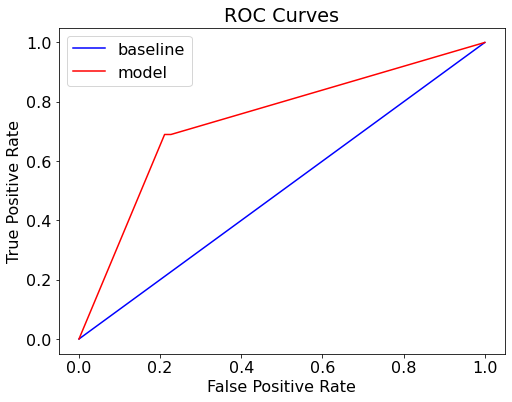

In [79]:
evaluate_model(predictions, probs, train_predictions, train_probs)

we can see the model performance is not very good, the model curve is not close to the top left.

## confusion matrix

In [80]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[101  27]
 [ 27  60]]


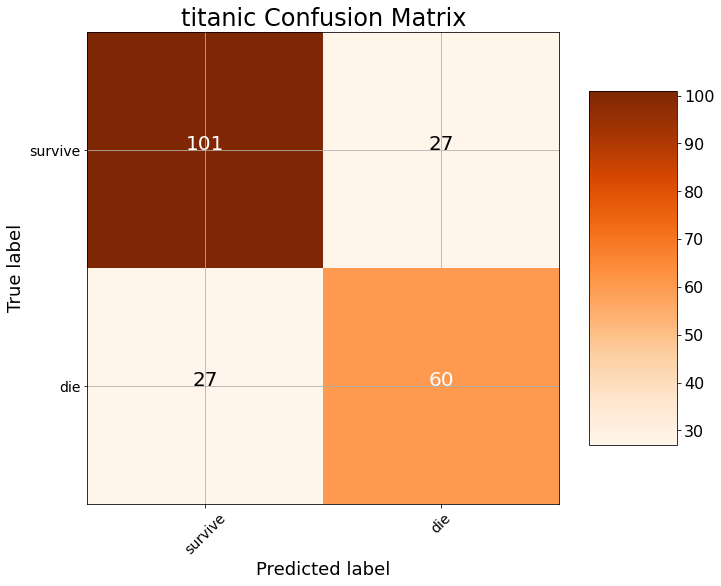

In [81]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['survive', 'die'],
                      title = 'titanic Confusion Matrix')

This shows the classifications predicted by the model on the test data along with the real labels. We can see that our model has equal number of false negative and false positive of 27

## visualize the tree

[Text(685.0446428571428, 978.48, 'sex_code <= 0.5\ngini = 0.483\nsamples = 499\nvalue = [296, 203]'),
 Text(373.6607142857143, 761.0400000000001, 'Pclass <= 2.5\ngini = 0.359\nsamples = 179\nvalue = [42, 137]'),
 Text(199.28571428571428, 543.6, 'Age <= 2.5\ngini = 0.101\nsamples = 113\nvalue = [6, 107]'),
 Text(99.64285714285714, 326.1600000000001, 'Fare <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(49.82142857142857, 108.72000000000003, '\n  (...)  \n'),
 Text(149.46428571428572, 108.72000000000003, '\n  (...)  \n'),
 Text(298.92857142857144, 326.1600000000001, 'Age <= 56.5\ngini = 0.086\nsamples = 111\nvalue = [5, 106]'),
 Text(249.10714285714283, 108.72000000000003, '\n  (...)  \n'),
 Text(348.75, 108.72000000000003, '\n  (...)  \n'),
 Text(548.0357142857142, 543.6, 'Age <= 36.5\ngini = 0.496\nsamples = 66\nvalue = [36, 30]'),
 Text(498.21428571428567, 326.1600000000001, 'Fare <= 20.8\ngini = 0.497\nsamples = 56\nvalue = [26, 30]'),
 Text(448.3928571428571, 108.7200000

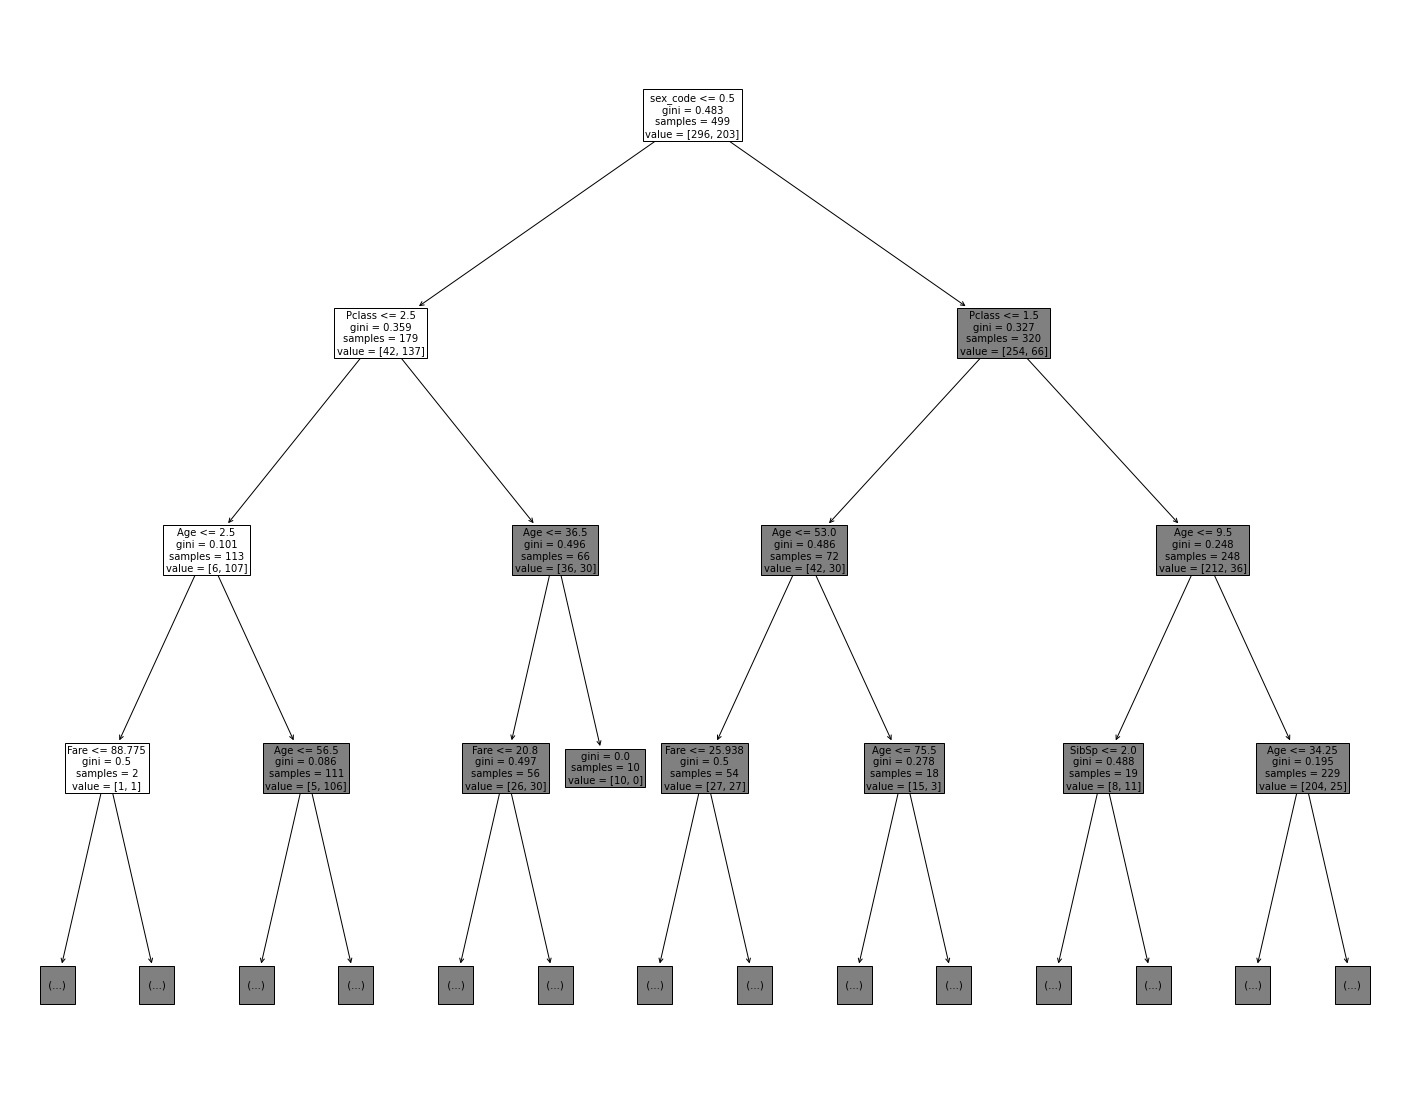

In [82]:
import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from PIL import Image

# Features for feature importances
features = list(feature.columns)

fig = plt.figure(figsize=(25,20))
plot_tree(tree, max_depth=3, feature_names = features)

We can see that our model is extremely deep and has many nodes. To reduce the variance of our model, we could limit the maximum depth or the number of leaf nodes. Another method to reduce the variance is to use more trees, each one trained on a random sampling of the observations. 

# use random forest to forecase survival or not 

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=42,
                       verbose=1)

In [84]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 196
Average maximum depth 15


## random forest results

In [85]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.76 Train: 0.99
Precision Baseline: 0.4 Test: 0.75 Train: 1.0
Roc Baseline: 0.5 Test: 0.84 Train: 1.0


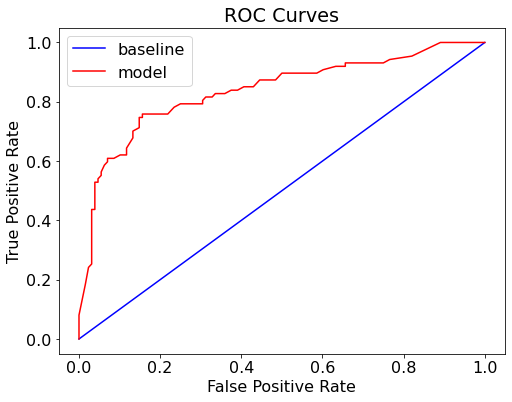

In [86]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

compared with decision tree result, the performance of random forest (0.76;0.75) is better than decision tree (0.69;0.69)

Confusion matrix, without normalization
[[106  22]
 [ 21  66]]


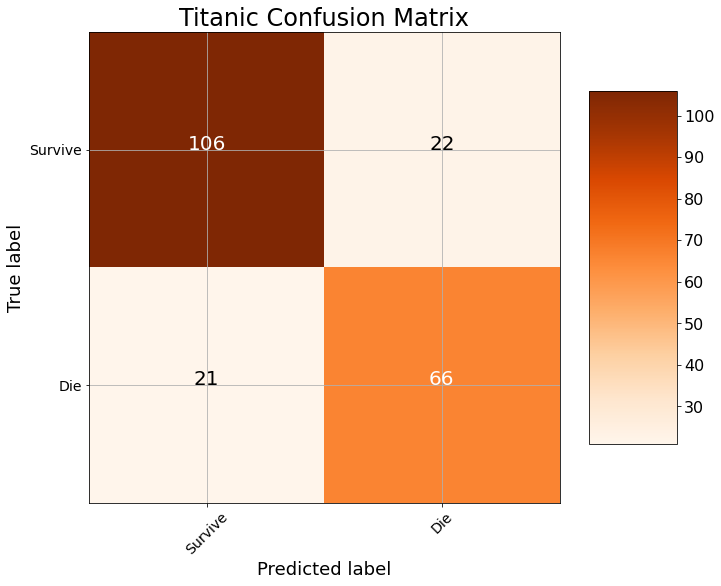

In [87]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Survive', 'Die'],
                      title = 'Titanic Confusion Matrix')

Compared with the result of decision tree, we can see that the random forest have more True positive and true negative than that of decision tree.

In [88]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
4,Fare,0.281195
1,Age,0.279713
5,sex_code,0.251713
0,Pclass,0.101193
2,SibSp,0.048439
3,Parch,0.037747


## Random Forest Optimization through Random Search

In order to maximize the performance of the random forest, we can perform a random search for better hyperparameters. This will randomly select combinations of hyperparameters from a grid, evaluate them using cross validation on the training data, and return the values that perform the best. 

In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators':  np.linspace(10,20, 5).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20,3).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 30, 5).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(train, train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.5s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 11, 20],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 15, 20, 25,
                                                           30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([10, 12, 15, 17, 20])},
                   random_state=42, scoring='roc_auc', verbose=1)

In [90]:
rs.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'max_leaf_nodes': 10,
 'max_features': 0.5,
 'max_depth': 20,
 'bootstrap': False}

## use best model

In [91]:
best_model = rs.best_estimator_

In [92]:
train_rf_predictions = best_model.predict(train)
train_rf_probs = best_model.predict_proba(train)[:, 1]

rf_predictions = best_model.predict(test)
rf_probs = best_model.predict_proba(test)[:, 1]

In [93]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 19
Average maximum depth 5


Recall Baseline: 1.0 Test: 0.64 Train: 0.71
Precision Baseline: 0.4 Test: 0.88 Train: 0.94
Roc Baseline: 0.5 Test: 0.86 Train: 0.91


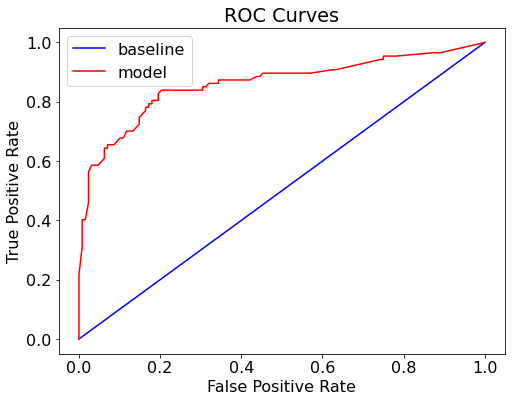

In [94]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

compare the best model using random search, I find that the recall in the new model (0.64) performs worse than the ogrinial random forest model (0.76).
meanwhile, the precision of the new model (0.88)is better than the original model (0.75).
this verifies the trade-off relationship between precision and recall.
Meanwhile, it also shows that I use too few parameters in the random search, and the new random forest model is not very good. One way to imporve is to try more parameters to improve the model performance.

[Text(871.875, 978.48, 'sex_code <= 0.5\ngini = 0.483\nsamples = 499\nvalue = [296, 203]'),
 Text(581.25, 761.0400000000001, 'Parch <= 3.5\ngini = 0.359\nsamples = 179\nvalue = [42, 137]'),
 Text(465.0, 543.6, 'Fare <= 10.481\ngini = 0.335\nsamples = 174\nvalue = [37, 137]'),
 Text(232.5, 326.1600000000001, 'Age <= 23.5\ngini = 0.499\nsamples = 29\nvalue = [15, 14]'),
 Text(116.25, 108.72000000000003, '\n  (...)  \n'),
 Text(348.75, 108.72000000000003, '\n  (...)  \n'),
 Text(697.5, 326.1600000000001, 'Pclass <= 2.5\ngini = 0.257\nsamples = 145\nvalue = [22, 123]'),
 Text(581.25, 108.72000000000003, '\n  (...)  \n'),
 Text(813.75, 108.72000000000003, '\n  (...)  \n'),
 Text(697.5, 543.6, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(1162.5, 761.0400000000001, 'Fare <= 15.621\ngini = 0.327\nsamples = 320\nvalue = [254, 66]'),
 Text(1046.25, 543.6, 'Age <= 10.5\ngini = 0.212\nsamples = 191\nvalue = [168, 23]'),
 Text(930.0, 326.1600000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'

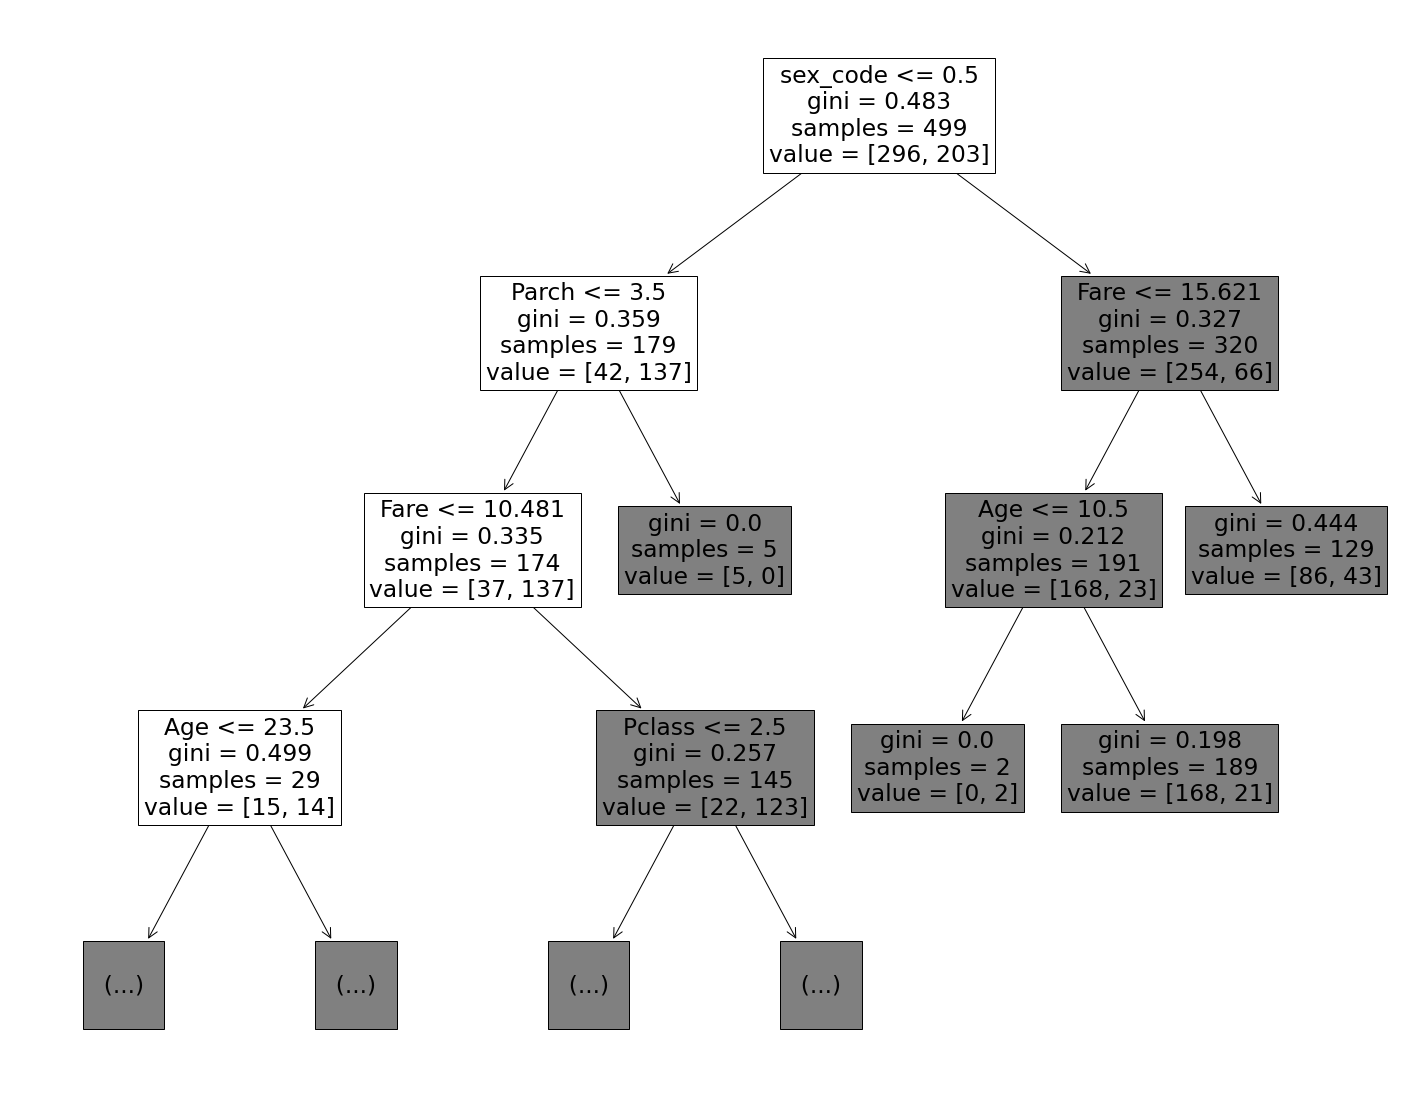

In [95]:
from sklearn import tree
estimator = best_model.estimators_[1]

fig = plt.figure(figsize=(25,20))
tree.plot_tree(estimator, max_depth=3, feature_names = features)
#fig.savefig("tree_estimator.png")

# use neutral network to forecast survival or not

In [125]:
from sklearn.neural_network import MLPClassifier
X = train
y = train_labels
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(10, 2), random_state=1)

clf.fit(X, y)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 2), random_state=1,
              solver='lbfgs')

In [126]:
print(cross_val_score(clf, train, train_labels, cv=10))

[0.86       0.78       0.82       0.86       0.84       0.86
 0.76       0.76       0.74       0.75510204]


In [127]:
# Make probability predictions
neural_train_probs = clf.predict_proba(train)[:, 1]
neural_probs = clf.predict_proba(test)[:, 1]

neural_train_predictions = clf.predict(train)
neural_predictions = clf.predict(test)


In [128]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, neural_train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, neural_probs)}')

Train ROC AUC Score: 0.8599304353614698
Test ROC AUC  Score: 0.8539870689655172


we can see the 